In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### First compute data covariance matrix

In [79]:
jackknife_file = '../../multi_xi/xi_jack_n39_m24_11.dat'
xi_jack = np.loadtxt(jackknife_file,skiprows=2)
r_center = np.genfromtxt(jackknife_file,max_rows=1,skip_header=0)
mu_center = np.genfromtxt(jackknife_file,max_rows=1,skip_header=1)

n = len(r_center)
m = len(mu_center)

### Load binfile

In [2]:
binfile = np.loadtxt('../../python/hybrid_binfile_cut.csv')

## NEED TO ADD WEIGHTS

In [182]:
n_jack = np.zeros(n*m)
for i in range(n*m):
    good_jack=np.where(np.isfinite(xi_jack[:,i]))[0]#sum(axis=0)
    

ValueError: operands could not be broadcast together with shapes (936,) (321,) (936,) 

In [184]:
np.isfinite(xi_jack[:,0]).shape

(321,)

### Compute covariance

In [87]:
mean_jackknife = np.zeros(n*m)
for bin_id in range(n*m):
    this_xi = xi_jack.T[bin_id]
    mean_jackknife[bin_id] = np.mean(this_xi[np.isfinite(this_xi)])

In [110]:
np.sum((np.isfinite(xi_jack.T[67])&(np.isfinite(xi_jack.T[67]))))

169

In [150]:
good_jk

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        296]),)

In [152]:
print("Computing data jackknife covariance matrix")
data_covariance = np.zeros([n*m,n*m])
for bin_a in range(n*m):
    for bin_b in range(n*m):
        # Define non NaN jackknifes for bin
        good_jk = np.where((np.isfinite(xi_jack[:,bin_a]))&(np.isfinite(xi_jack[:,bin_b])))
        tmp = np.sum((xi_jack[good_jk,bin_a]-mean_jackknife[bin_a])*(xi_jack[good_jk,bin_b]-mean_jackknife[bin_b]))
        data_covariance[bin_a,bin_b]=tmp/(len(good_jk[0])-1)

Computing data jackknife covariance matrix


In [153]:
data_covariance

array([[ 6.26913572e-01,  1.70662072e+00,  2.08744960e-02, ...,
         2.27592030e-02, -1.93258956e-02, -2.23306659e-02],
       [ 1.70662072e+00,  7.78081539e+00,  3.85509251e-03, ...,
         1.07439234e-01, -4.58728666e-02, -1.19776791e-01],
       [ 2.08744960e-02,  3.85509251e-03,  5.66583517e-02, ...,
        -3.71030790e-04,  2.21569033e-03,  2.73935143e-03],
       ...,
       [ 2.27592030e-02,  1.07439234e-01, -3.71030790e-04, ...,
         2.50536764e-03,  1.11803499e-04, -1.24023917e-03],
       [-1.93258956e-02, -4.58728666e-02,  2.21569033e-03, ...,
         1.11803499e-04,  2.18820488e-03,  1.23937045e-03],
       [-2.23306659e-02, -1.19776791e-01,  2.73935143e-03, ...,
        -1.24023917e-03,  1.23937045e-03,  2.98242597e-03]])

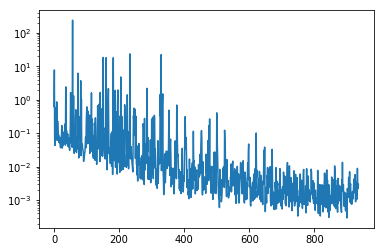

In [161]:
plt.plot(np.diag(data_covariance))
plt.yscale('log')

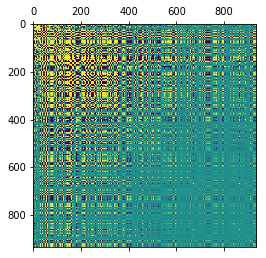

In [159]:
vmax=np.percentile(data_covariance.ravel(),90)
plt.matshow(data_covariance,vmax=vmax,vmin=-vmax)